# Named-entity recognition

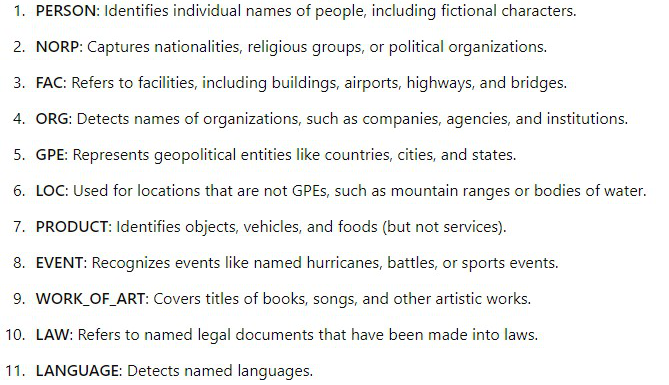

In [10]:
import nltk
nltk.download("punkt")
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# using splitting method

In [14]:
data = "I love data science ,and machine Learning"
token= data.split(",")
token

['I love data science ', 'and machine Learning']

# using word_tokenize method

In [15]:
data = "I love data science, and machine Learning"
token= word_tokenize(data)
token

['I', 'love', 'data', 'science', ',', 'and', 'machine', 'Learning']

# using Spacy

spaCy is an open-source library for advanced Natural Language Processing (NLP) in Python. It's designed to help developers build applications that process and understand large volumes of text, such as for information extraction, natural language understanding, and text generation

In [19]:
import spacy
# Load a pre-trained model
nlp = spacy.load("en_core_web_sm")
text = nlp("We love machine Learning and AI")
tokens = [token.text for token in text]
print(tokens)

['We', 'love', 'machine', 'Learning', 'and', 'AI']


# Stop word using NLTK

In [24]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_word = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
print(stop_word)

{'that', 'being', 'having', 'wasn', 'she', 'a', 'hadn', 'why', 'o', 'out', 'some', "wouldn't", 'did', "she's", 'aren', 'how', "didn't", 'needn', 'before', 'until', 'couldn', 'theirs', 'the', 'themselves', 'herself', 'too', 'not', 'me', 'weren', "weren't", "isn't", 'yourself', 'had', 'ain', 'above', 'he', 'so', 'mightn', 'our', "doesn't", 'when', 't', "needn't", 'during', 'and', 'these', 'is', 'y', "aren't", 'mustn', 'by', 'over', "should've", "you'd", 'further', 'each', 'have', 'between', 'about', 'than', 'against', 'again', "shan't", 'into', "hadn't", 'wouldn', 'more', 'we', 'off', 'am', 'only', 'doesn', "couldn't", 'his', 'her', "hasn't", 'this', 'it', 'where', 'can', "you're", 'will', "that'll", "you've", 'ours', 'after', 'up', 'now', 'd', 'at', 'm', "it's", 'just', 'isn', 'be', 'has', 'an', 'from', 'once', 'all', 'own', 'itself', 'hasn', 'shouldn', 'their', "you'll", 'because', 'here', 'those', 'on', 'yours', 'such', 'same', 'hers', "mightn't", 've', 'its', 'for', 's', 'they', 're'

In [37]:
data = "I love more data science  than machine Learning. we all work with ML"
token= word_tokenize(data)
Clean_token= [word for word in token if word.lower() not in stop_word]

In [38]:
print(Clean_token)

['love', 'data', 'science', 'machine', 'Learning', '.', 'work', 'ML']


# Using Spacy

In [36]:
text ="I love more data science  than machine Learning. we all work with ML"
token = nlp(text)
clean_tokens = [word.text for word in token if not word.is_stop]
print(clean_tokens)

['love', 'data', 'science', ' ', 'machine', 'Learning', '.', 'work', 'ML']


In [142]:
# Process the text to create a Doc object
doc = nlp("I love more data science than machine learning. We all work with ML. Data science is now a most demanding sector all over the world.")

# Extract and filter tokens
tokens = [(token.text, token.pos_, token.lemma_, token.ent_type_) 
          for token in doc if not token.is_stop and token.pos_ != 'PUNCT']

print(tokens)


[('love', 'VERB', 'love', ''), ('data', 'NOUN', 'datum', ''), ('science', 'NOUN', 'science', ''), ('machine', 'NOUN', 'machine', ''), ('learning', 'NOUN', 'learning', ''), ('work', 'VERB', 'work', ''), ('ML', 'PROPN', 'ML', 'ORG'), ('Data', 'NOUN', 'datum', ''), ('science', 'NOUN', 'science', ''), ('demanding', 'ADJ', 'demanding', ''), ('sector', 'NOUN', 'sector', ''), ('world', 'NOUN', 'world', '')]


# joining

In [40]:
clean_text= ['love', 'data', 'science', 'machine', 'Learning', '.', 'work', 'ML']
" ".join(clean_text)

'love data science machine Learning . work ML'

In [41]:
text=['love', 'data', 'science', ' ', 'machine', 'Learning', '.', 'work', 'ML']
" ".join(text)

'love data science   machine Learning . work ML'

# NER using Spacy

In [20]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
# Extract entities
for ent in doc.ents:
    print(ent.text, ent.label_) 

Apple ORG
U.K. GPE
$1 billion MONEY


In [8]:
#!pip install en-core-web-sm

In [48]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Process the text
data = nlp("I love ML and Apple gadget for that i buy a course with $10 and watch it on my apple phone for next seven days")

# Print tokens with their IOB tag and entity type
print([(X.text, X.ent_iob_, X.ent_type_) for X in data])

[('I', 'O', ''), ('love', 'O', ''), ('ML', 'B', 'ORG'), ('and', 'O', ''), ('Apple', 'B', 'ORG'), ('gadget', 'O', ''), ('for', 'O', ''), ('that', 'O', ''), ('i', 'O', ''), ('buy', 'O', ''), ('a', 'O', ''), ('course', 'O', ''), ('with', 'O', ''), ('$', 'O', ''), ('10', 'B', 'MONEY'), ('and', 'O', ''), ('watch', 'O', ''), ('it', 'O', ''), ('on', 'O', ''), ('my', 'O', ''), ('apple', 'O', ''), ('phone', 'O', ''), ('for', 'O', ''), ('next', 'B', 'DATE'), ('seven', 'I', 'DATE'), ('days', 'I', 'DATE')]


1. "o" menas the token is outside of the named entity 
2. "I" indicates that the token is inside a named entity that continues from a previous token. 
3. "B" means this token is at the start of an entity.

In [51]:
displacy.render(nlp(str(data)),style="ent")

In [54]:
displacy.render(nlp(str(data)),style="dep",options={"distance":150})

# sentance written in a different way makes a huge impact

In [67]:
doc= "Mr. Zahid book a ticket for travel from Dhaka to Jashore in Bangladesh by Biman Bangladesh Airlines with $20  at 9pm"
displacy.render(nlp(str(doc)),style="ent")

In [69]:
doc= "Mr. Zahid call for a ticket from Dhaka to Jashore by Biman Bangladesh Airlines with $20  at 9pm"
displacy.render(nlp(str(doc)),style="ent")

# Scraping

In [80]:
from bs4 import BeautifulSoup
import requests
import re

def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", "aside"]):
        script.extract()
    return ' '.join(re.split(r'[\n\t]+', soup.get_text()))

ny_bb = url_to_string("https://www.nytimes.com/by/adam-goldman")
article = nlp(ny_bb)
len(article.ents)



103

In [81]:
article

          Adam Goldman - The New York Times                                                                                                                                                     Skip to contentSkip to site index Today’s PaperAdam GoldmanI’m a reporter for The New York Times based in Washington, D.C., and I write about national security.AboutContactLatestWhat I CoverI cover the F.B.I. and contribute to reporting on the Justice Department as well as other intelligence agencies.My BackgroundI started my career at a small newspaper in Virginia covering the mayor and police department. I then moved to Birmingham, Ala., where I eventually became the night cops reporter and helped cover the arrest and conviction of a Klansman involved in the 1963 bombing of the 16th Street Baptist Church. This period prompted a deep interest in the F.B.I. and terrorism. But Las Vegas called and I joined The Associated Press to write about gambling companies and tourism.Later, I moved to The A.P.

In [83]:
labels = [x.label_ for x in article.ents]

In [84]:
Counter(labels)

Counter({'ORG': 38,
         'PERSON': 34,
         'GPE': 11,
         'DATE': 9,
         'WORK_OF_ART': 3,
         'CARDINAL': 3,
         'NORP': 2,
         'TIME': 1,
         'ORDINAL': 1,
         'MONEY': 1})

# most common NER

In [85]:
texts= [x.text for x in article.ents]
Counter(texts).most_common(3)

[('Adam Goldman', 6), ('F.B.I.', 5), ('Times', 4)]

In [120]:
sentence= [x for x in article.ents]
print(sentence[: 15])

[Adam Goldman - The New York Times                                                                                                                                                     Skip, Today, The New York Times, Washington, D.C., F.B.I., the Justice Department, Virginia, Birmingham, Ala., night, Klansman, 1963, 16th, F.B.I.]


In [121]:
displacy.render(sentence[: 15], style= "ent")

In [125]:
displacy.render(sentence[:2], style= "dep")

In [132]:
list1 = [y for y in nlp(str(sentence[:15]))]
list1[13].is_stop

True

In [134]:
list1

[[,
 Adam,
 Goldman,
 -,
 The,
 New,
 York,
 Times,
                                                                                                                                                     ,
 Skip,
 ,,
 Today,
 ,,
 The,
 New,
 York,
 Times,
 ,,
 Washington,
 ,,
 D.C.,
 ,,
 F.B.I.,
 ,,
 the,
 Justice,
 Department,
 ,,
 Virginia,
 ,,
 Birmingham,
 ,,
 Ala.,
 ,,
 night,
 ,,
 Klansman,
 ,,
 1963,
 ,,
 16th,
 ,,
 F.B.I.,
 ]]

In [133]:
for i in list1:
    if i.is_stop:
        print(i)

The
The
the


In [136]:
[(x, x.pos_, x.lemma_, x.ent_type_) for x in [y for y in nlp(str(sentence[: 20])) if not y.is_stop and y.pos_ != 'PUNCT']]

[([, 'X', '[', ''),
 (Adam, 'PROPN', 'Adam', 'PERSON'),
 (Goldman, 'PROPN', 'Goldman', 'PERSON'),
 (New, 'PROPN', 'New', 'PERSON'),
 (York, 'PROPN', 'York', 'PERSON'),
 (Times, 'PROPN', 'Times', 'PERSON'),
 (                                                                                                                                                    ,
  'SPACE',
  '                                                                                                                                                    ',
  'PERSON'),
 (Skip, 'PROPN', 'Skip', 'PERSON'),
 (Today, 'NOUN', 'today', 'DATE'),
 (New, 'PROPN', 'New', 'ORG'),
 (York, 'PROPN', 'York', 'ORG'),
 (Times, 'PROPN', 'Times', 'ORG'),
 (Washington, 'PROPN', 'Washington', 'GPE'),
 (D.C., 'PROPN', 'D.C.', 'GPE'),
 (F.B.I., 'PROPN', 'F.B.I.', 'ORG'),
 (Justice, 'PROPN', 'Justice', 'ORG'),
 (Department, 'PROPN', 'Department', 'ORG'),
 (Virginia, 'PROPN', 'Virginia', 'GPE'),
 (Birmingham, 'PROPN', 'Birmingham', 'GPE'),
 (Ala., '

# All the relevent Name with entity type 

In [138]:
dict([(str(y),y.label_) for y in nlp(str(sentence[: 20])).ents])

{'Adam Goldman - The New York Times                                                                                                                                                     Skip': 'PERSON',
 'Today': 'DATE',
 'The New York Times': 'ORG',
 'Washington': 'GPE',
 'D.C.': 'GPE',
 'F.B.I.': 'ORG',
 'the Justice Department': 'ORG',
 'Virginia': 'GPE',
 'Birmingham': 'GPE',
 'Ala.': 'GPE',
 'Klansman': 'PERSON',
 '1963': 'DATE',
 '16th': 'ORDINAL',
 'Las Vegas': 'GPE',
 'The Associated Press': 'ORG',
 'A.P.': 'ORG',
 'New York': 'GPE',
 'several years': 'DATE'}